<a href="https://colab.research.google.com/github/shalu236616/AI-and-ML-PROJECT-/blob/main/PROJECT_WORK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT ON PHISHING WEBSITE DEDUCTION USING ANN AND DIFFERENT ML ALGORITHM**
















NAME - SHALU TIWARI
ENROLLMENT NO- SAU /CS/MTECH(CS)/2024/07

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt



In [ ]:
# Load the dataset
df = pd.read_csv('/content/phishing website dataset.csv')

# Check shape
print(df.shape)


(11055, 32)


In [ ]:
print(df.isnull().sum())

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

In [ ]:
# If class column is not named, assume it's the last one
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert to binary: -1 -> 0 (Not Phishing), 1 -> 1 (Phishing)
y = y.replace(-1, 0)


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7670 - loss: 0.4662 - val_accuracy: 0.9299 - val_loss: 0.1691
Epoch 2/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9178 - loss: 0.2108 - val_accuracy: 0.9376 - val_loss: 0.1519
Epoch 3/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9273 - loss: 0.1852 - val_accuracy: 0.9426 - val_loss: 0.1429
Epoch 4/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9356 - loss: 0.1667 - val_accuracy: 0.9435 - val_loss: 0.1336
Epoch 5/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9334 - loss: 0.1622 - val_accuracy: 0.9435 - val_loss: 0.1297
Epoch 6/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9436 - loss: 0.1453 - val_accuracy: 0.9466 - val_loss: 0.1247
Epoch 7/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9399 - loss: 0.1441 - val_accuracy: 0.9475 - val_loss: 0.1197
Epoch 8/50
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9425 - loss: 0.1350 - val_accuracy: 0.

In [ ]:
y_pred_nn_proba = model.predict(X_test)  # This gives probabilities
y_pred_nn = (y_pred_nn_proba > 0.5).astype("int32")  # Convert to binary class labels


70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
from sklearn.metrics import accuracy_score

nn_acc = accuracy_score(y_test, y_pred_nn)
print("Neural Network Accuracy:", nn_acc)


Neural Network Accuracy: 0.9701492537313433


In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nn))

Confusion Matrix:
[[ 936   44]
 [  22 1209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.96      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



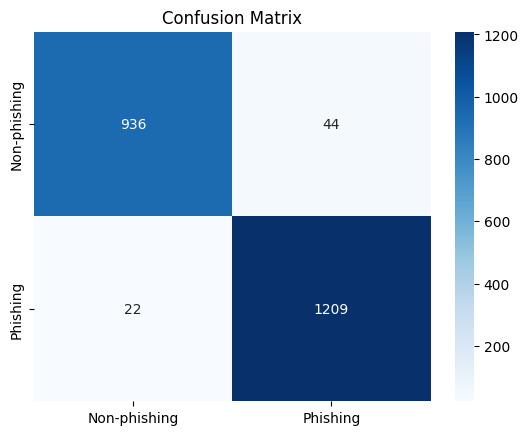

In [ ]:
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-phishing", "Phishing"], yticklabels=["Non-phishing", "Phishing"])
plt.title("Confusion Matrix")
plt.show()

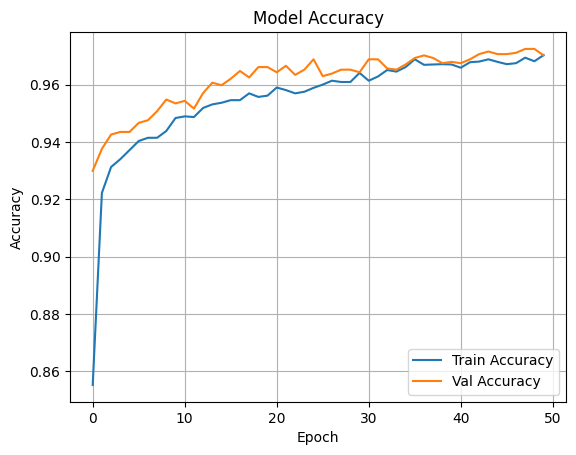

In [ ]:


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


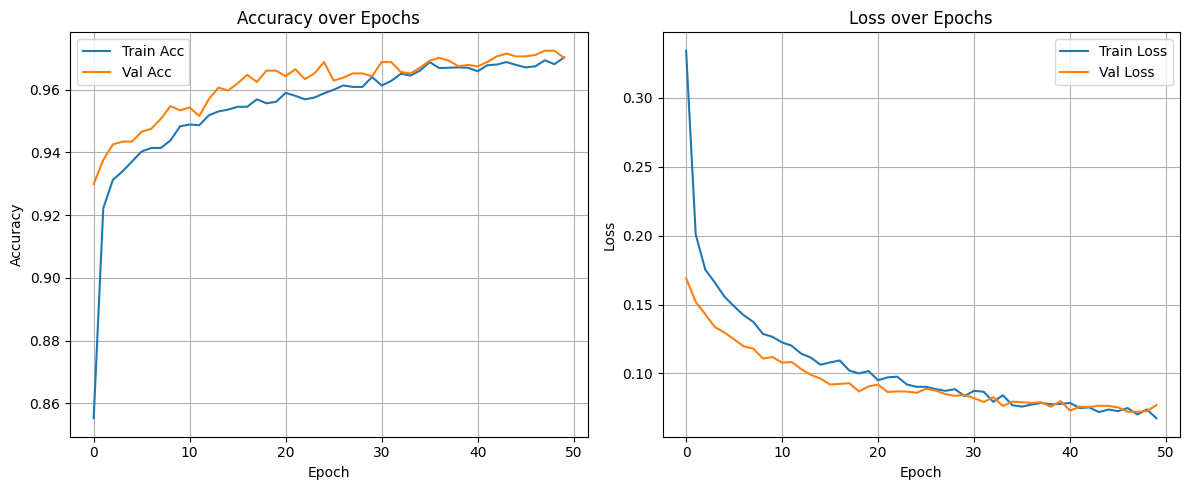

In [ ]:


# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.966078697421981
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       980
           1       0.97      0.97      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [17:50:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9715061058344641
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       980
           1       0.97      0.98      0.97      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9294436906377205
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       980
           1       0.93      0.95      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='auto')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.6621438263229308
              precision    recall  f1-score   support

           0       0.66      0.50      0.57       980
           1       0.67      0.79      0.72      1231

    accuracy                           0.66      2211
   macro avg       0.66      0.65      0.65      2211
weighted avg       0.66      0.66      0.65      2211



In [ ]:
from sklearn.metrics import accuracy_score

# For Neural Network
nn_acc = accuracy_score(y_test, y_pred_nn)

# For Random Forest
rf_acc = accuracy_score(y_test, y_pred_rf)

# For XGBoost
xgb_acc = accuracy_score(y_test, y_pred_xgb)

# For Logistic Regression
lr_acc = accuracy_score(y_test, y_pred_lr)

# For SVM
svm_acc = accuracy_score(y_test, y_pred_svm)


In [ ]:


results = {
    "Model": ["Neural Network", "Random Forest", "XGBoost", "Logistic Regression", "SVM"],
    "Accuracy": [nn_acc, rf_acc, xgb_acc, lr_acc, svm_acc]
}

df = pd.DataFrame(results)
print(df)

                 Model  Accuracy
0       Neural Network  0.970149
1        Random Forest  0.966079
2              XGBoost  0.971506
3  Logistic Regression  0.929444
4                  SVM  0.662144


<Axes: title={'center': 'Model Comparison'}, xlabel='Model'>

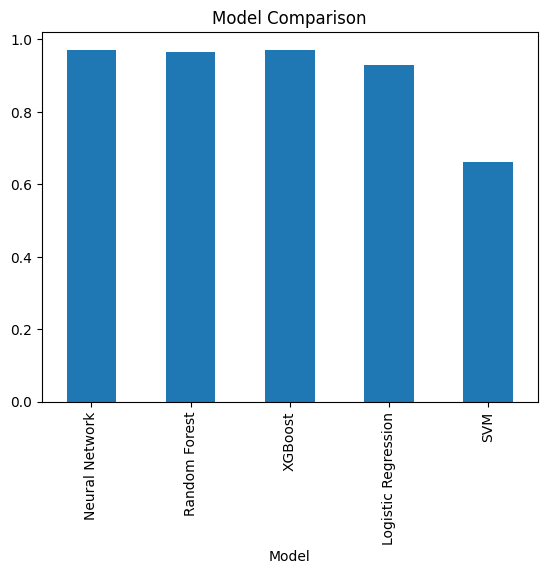

In [ ]:
df.plot(kind='bar', x='Model', y='Accuracy', legend=False, title='Model Comparison')